### Programming for Psychologists (2024/2025)
### Home assignment
**Course code:** M_PROPSY\
**Student:** Anna Pecherkina\
**Course coordinator:** Matthias Nau\
**Teaching assistant:** Anna van Harmelen

<em>Used data</em>: https://neurosynth.org/analyses/terms/ptsd/

<em>Description</em>: This Jupyter Notebook demonstrates analysis of fMRI PTSD data. The notebook generates two informative figures: the first overlays functional data onto anatomical brain scans to pinpoint areas strongly linked to the PTSD, while the second displays a histogram of voxel intensities for a detailed view of brain activity.

#### Finding and reading files with data
 The code uses the ``os`` module to list and filter files within the ``data`` directory.\
 It identifies files with structural and functional MRI data based on specific name patterns.\
 The ``nilearn`` library is used to load both anatomical and functional MRI images.


In [2]:
import os
from nilearn import image

# Find files in the directory 'data'
files = os.listdir('data')
anatomical_file = [f for f in files if ('anatomical' in f) and ('.nii' in f)]
uniformity_test_file = [f for f in files if ('uniformity-test' in f) and ('.nii' in f)]

# Read structural MRI data
anatomical = image.load_img('data/' + anatomical_file[0])
# Read functional MRI data
functional = image.load_img('data/' + uniformity_test_file[0])

#### Visualize functional data ontop of the anatomical scan

Using [nilearn.plotting.plot_stat_map](https://nilearn.github.io/dev/modules/generated/nilearn.plotting.plot_stat_map.html), the notebook overlays functional data onto anatomical scan for visualization.

**Title:** PTSD\
**[Colormap](https://matplotlib.org/stable/users/explain/colors/colormaps.html):** bone\
**Voxel threshold:** 0.1\
**Cut coordinates:** x = -23, y = -3, z = -14

The resulting visualization is saved as an image file in ``results/ptsd_scan.png`` and is shown on the screen.

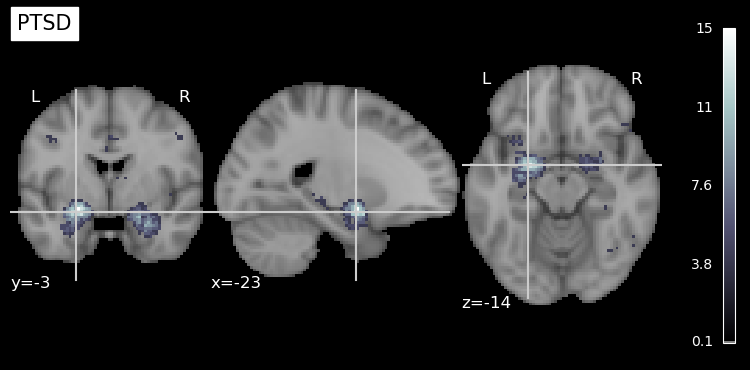

In [6]:
from nilearn import plotting
import matplotlib.pyplot as plt

# Visualization functional data ontop of the anatomical scan
plotting.plot_stat_map(stat_map_img=functional,
                                 bg_img=anatomical,
                                 cmap=plt.get_cmap("bone"),
                                 title="PTSD",
                                 threshold=0.1,
                                 cut_coords=(-23, -3, -14))

# Output to file
plt.savefig('results/ptsd_scan.png')

#### Plotting a histogram of the values in the functional data file
The ``nibabel`` library reads the 3D image data, which is processed into a histogram.\
The data is collected into a list, filtered to include only positive values.\
The ``matplotlib.pyplot`` library visualizes this list in a histogram, indicating the distribution of values.\
The histogram image is saved to ``results/histogram.png``

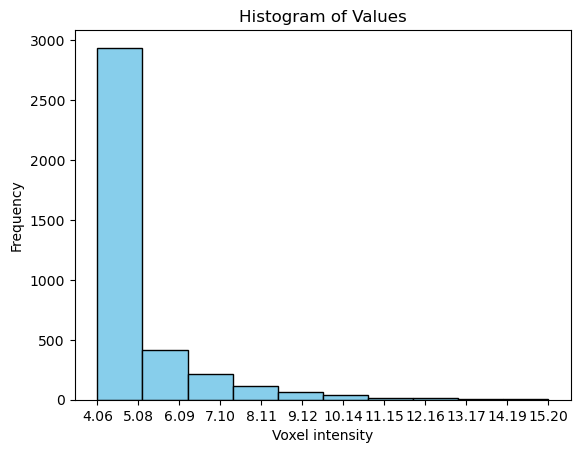

In [7]:
import nibabel as nib

# Histogram
data_file = nib.load('data/' + uniformity_test_file[0])
data_array = data_file.get_fdata()

# Read data from three-dimensions array
results_for_histogram = []
for x in data_array:
    for y in x:
        for z in y:
            if z > 0:
                results_for_histogram.append(z)

# Visualize data
plt.hist(results_for_histogram, color='skyblue', edgecolor='k')
plt.xlabel('Voxel intensity')
plt.ylabel('Frequency')
plt.title('Histogram of Values')
plt.xticks(sorted(set(results_for_histogram)))

#Save results to the file
plt.savefig('results/histogram.png')